In [188]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import cross_val_score
import seaborn as sns
from scipy import stats
from sklearn.tree import plot_tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import linear_model
from sklearn.metrics import root_mean_squared_error

In [189]:
df = pd.read_csv("../data/processed_data.csv")

In [182]:
df_numeric_all = df.drop(['Unnamed: 0', 'Occupation', 'Blood Pressure','Person ID'],axis=1)
df_numeric = df.drop(['Unnamed: 0', 'Occupation', 'Blood Pressure','Person ID'], axis=1)


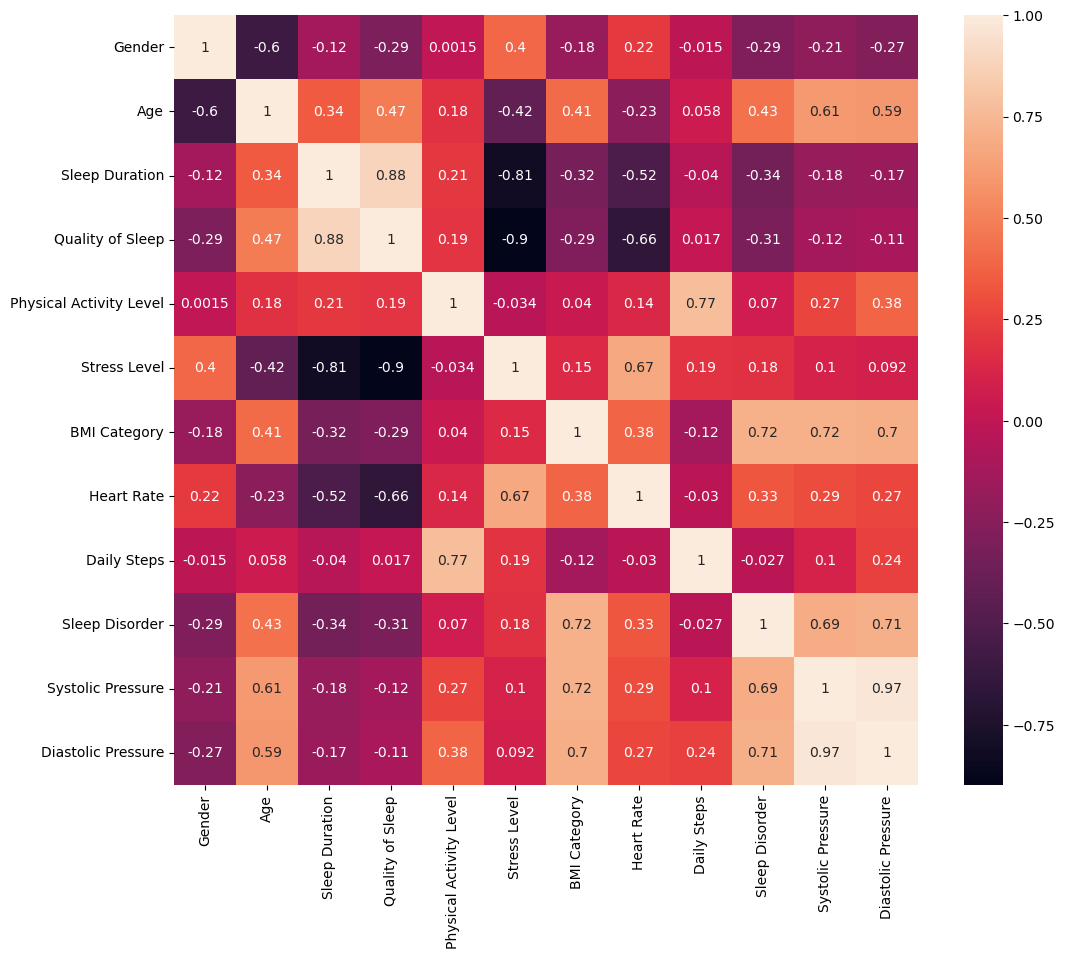

In [190]:
df_numeric_normalized=df_numeric/df_numeric.max()
corr=df_numeric_normalized.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,annot=True)
plt.show()


In [215]:
#Stress level based upon sleep duration, quality of sleep and heart rate
X=df_numeric.loc[:,['Stress Level','Sleep Duration','Heart Rate']].to_numpy()
y=df_numeric.loc[:,['Quality of Sleep']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(299, 3)
(75, 3)
(299, 1)
(75, 1)


In [216]:
#Regresión Multivariable
#Quality of Sleep based upon Stress Level and Sleep Duration
X_mult=df_numeric.loc[:,['Stress Level','Sleep Duration']].to_numpy()
y_mult=df_numeric.loc[:,['Quality of Sleep']].to_numpy()
X_train_mult, X_test_mult, y_train_mult, y_test_mult = train_test_split(X_mult, y_mult, test_size=0.2, random_state=65)
multreg=linear_model.LinearRegression(fit_intercept=True)
multreg.fit(X_train_mult,y_train_mult)
print('Coeficientes del modelo', multreg.coef_)
print('Coeficientes del modelo', multreg.intercept_)
calidad = multreg.score(X_train_mult,y_train_mult)
print('Calidad del modelo ',calidad)
RMSE = root_mean_squared_error(y_train_mult,multreg.predict(X_train_mult)) #COMPARA LA PREDICCION (en base a los valores de X_train) CONTRA LOS DATOS REALES (y_train)
print('RMSE del modelo ',RMSE) #RMSE es parecido a la desviación estándar

# Se concluye: QSleep = -0.3SL + 0.68SD + 4.36

Coeficientes del modelo [[-0.35120011  0.68005236]]
Coeficientes del modelo [4.36122564]
Calidad del modelo  0.888005772985367
RMSE del modelo  0.39459194737882997


In [218]:
#===============================================================================
# ALGORITMO: Decision Tree Classifier
tree=DecisionTreeClassifier()
tree.fit(X_train,y_train.ravel())
y_predictor=tree.predict(X_test)
print('Comparación de la predicción con la especie observada')
print('Predicción        = ', y_predictor)
print('Especie observada = ', y_test.ravel())

# Evalúa en AMBOS conjuntos
print('Score en Train:', tree.score(X_train, y_train))
print('Score en Test:', tree.score(X_test, y_test))

# Cross-validation
scores = cross_val_score(tree, X, y, cv=5)
print("Scores por fold:", scores)
print("Promedio CV:", scores.mean())
print("Desviación estándar:", scores.std())

Comparación de la predicción con la especie observada
Predicción        =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 7 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Especie observada =  [6 9 6 8 8 8 9 8 6 8 6 5 7 7 6 8 9 9 7 8 7 5 6 6 8 7 7 4 6 6 8 8 8 8 8 9 7
 9 6 6 8 8 8 7 9 8 6 9 8 9 6 6 8 6 7 7 9 7 9 7 9 8 7 8 4 5 8 9 7 8 8 7 6 8
 9]
Score en Train: 0.9899665551839465
Score en Test: 0.9866666666666667
Scores por fold: [0.97333333 0.94666667 0.94666667 0.78666667 0.90540541]
Promedio CV: 0.9117477477477477
Desviación estándar: 0.06620717226955251


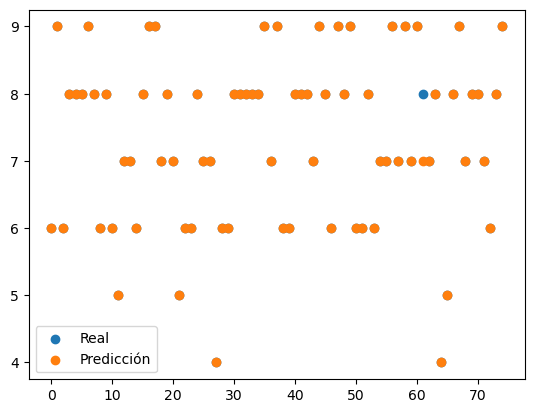

In [219]:
plt.scatter(range(len(y_test)), y_test, label="Real")
plt.scatter(range(len(y_predictor)), y_predictor, label="Predicción")
plt.legend()
plt.show()

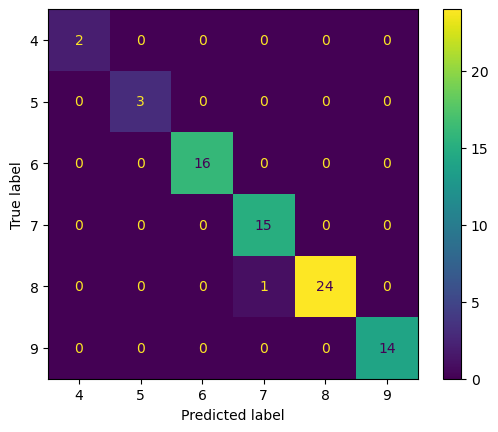

In [220]:
ConfusionMatrixDisplay.from_estimator(tree, X_test, y_test)
plt.show()


<Axes: xlabel='Sleep Duration', ylabel='Stress Level'>

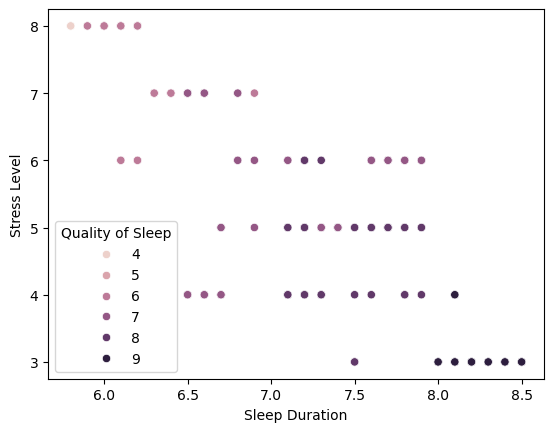

In [198]:
sns.scatterplot(x='Sleep Duration',y='Stress Level',hue='Quality of Sleep',data=df)

<Axes: xlabel='Sleep Duration', ylabel='Age'>

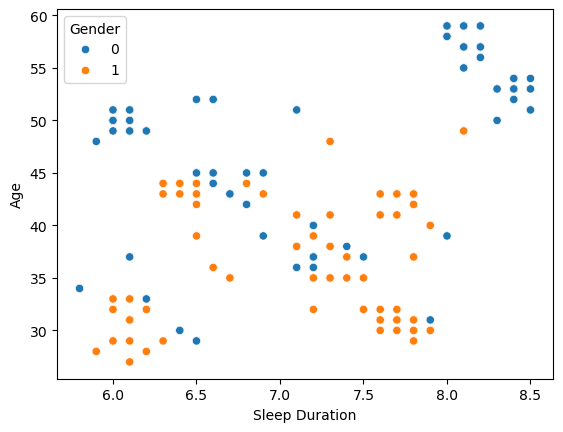

In [222]:
sns.scatterplot(x='Sleep Duration',y='Age',hue='Gender',data=df)